# Read the file 

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

In [6]:
df = pd.read_csv('base_table_pre_final.csv')
df.dtypes

Unnamed: 0              int64
Timestamp               int64
Journey_Pattern_ID     object
Date                   object
Vehicle_Journey_ID      int64
Lon_WGS84             float64
Lat_WGS84             float64
Delay                   int64
Stop_ID                 int64
At_Stop                 int64
Distance_Terminal       int64
datetime               object
day_of_week            object
Trip_Time               int64
Wind                    int64
Rain                    int64
Cloud                   int64
Temp                    int64
City_Centre             int64
midweek                 int64
dtype: object

In [7]:
df.head()

,Unnamed: 0,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,Wind,Rain,Cloud,Temp,City_Centre,midweek
0,0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0,22189,2012-11-06 00:00:00,Tuesday,0,0,0,0,0,1,1
1,1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0,14742,2012-11-06 00:00:00,Tuesday,0,0,0,0,0,1,1
2,2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0,16908,2012-11-06 00:00:00,Tuesday,0,0,0,0,0,0,1
3,3,1352160002,041B0002,2012-11-05,61,-6.264167,53.453217,-623,3874,1,21507,2012-11-06 00:00:02,Tuesday,0,0,0,0,0,0,1
4,4,1352160002,039A1002,2012-11-05,3795,-6.262447,53.346767,-532,1479,0,19970,2012-11-06 00:00:02,Tuesday,0,0,0,0,0,1,1


In [8]:
df.drop(df.columns[0], axis=1, inplace=True)
df.head(3)

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,Wind,Rain,Cloud,Temp,City_Centre,midweek
0,1352160000,00150001,2012-11-05,5826,-6.258584,53.340099,-361,4870,0,22189,2012-11-06 00:00:00,Tuesday,0,0,0,0,0,1,1
1,1352160000,046A1002,2012-11-05,7267,-6.259093,53.345425,-1101,794,0,14742,2012-11-06 00:00:00,Tuesday,0,0,0,0,0,1,1
2,1352160000,00140001,2012-11-05,6206,-6.257329,53.287521,-126,1047,0,16908,2012-11-06 00:00:00,Tuesday,0,0,0,0,0,0,1


# Get one Journey_Pattern_ID

In [9]:
df=df.loc[df['Journey_Pattern_ID']=='041B0002']
df.shape

(1549, 19)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df['City_Centre_number']=df.groupby(['Vehicle_Journey_ID','Journey_Pattern_ID','Date'])['City_Centre'].cumsum()
df.tail()

,Timestamp,Journey_Pattern_ID,Date,Vehicle_Journey_ID,Lon_WGS84,Lat_WGS84,Delay,Stop_ID,At_Stop,Distance_Terminal,datetime,day_of_week,Trip_Time,Wind,Rain,Cloud,Temp,City_Centre,midweek,City_Centre_number
1544,1352763914,041B0002,2012-11-12,61,-6.254620,53.472782,-1104,7134,0,16470,2012-11-12 23:45:14,Monday,2111,0,0,0,0,0,0,10
1545,1352763935,041B0002,2012-11-12,61,-6.259684,53.473812,-1123,3867,0,17787,2012-11-12 23:45:35,Monday,2132,0,0,0,0,0,0,10
1546,1352764094,041B0002,2012-11-12,61,-6.288721,53.482990,-1140,7135,0,19257,2012-11-12 23:48:14,Monday,2291,0,0,0,0,0,0,10
1547,1352764176,041B0002,2012-11-12,61,-6.299344,53.487488,-1140,7136,0,20002,2012-11-12 23:49:36,Monday,2373,0,0,0,0,0,0,10
1548,1352764315,041B0002,2012-11-12,61,-6.290333,53.485851,-1029,3874,1,21507,2012-11-12 23:51:55,Monday,2512,0,0,0,0,0,0,10


# Train Data set with statsmodels

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in X.columns.values:
    if X[col].dtypes=='object':
        # Using whole data to form an exhaustive list of levels
        data=X[col]
        le.fit(data.values)
        X[col]=le.transform(X[col])
X

NameError: name 'X' is not defined

In [13]:
feature_cols = ['Distance_Terminal','midweek','City_Centre_number']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Index(['Distance_Terminal', 'midweek', 'City_Centre_number'], dtype='object')

In [14]:
import statsmodels.formula.api as sm
df_linear = pd.concat([X, y], axis=1)
lm = sm.ols(formula = "Trip_Time ~ Distance_Terminal+City_Centre_number+midweek", data=df_linear).fit()

In [15]:
lm.params

Intercept            -293.524573
Distance_Terminal       0.130582
City_Centre_number     72.789709
midweek               145.699860
dtype: float64

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Trip_Time   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     2529.
Date:                Fri, 14 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:39:14   Log-Likelihood:                -11556.
No. Observations:                1549   AIC:                         2.312e+04
Df Residuals:                    1545   BIC:                         2.314e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -293.5246     38.009     -7.723      0.000    -368.079    -218.970
Distance_Terminal      0.1306      0.002     65.333      0.000       0.127       0.135
City_Centre_number    72.7897      3.630     20.051      0.000      65.669      79.910
midweek              145.6999     21.850      6.668      0.000     102.841     188.559
==============================================================================
Omnibus:                      286.296   Durbin-Watson:                   0.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.714
Skew:                           0.882   Prob(JB):                    2.04e-220
Kurtosis:                       6.545   Cond. No.                     3.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
lm_predictions = lm.predict(X)

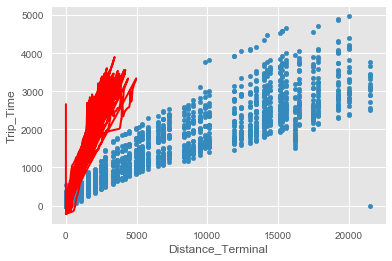

In [18]:
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time')
plt.plot(y, lm_predictions, c='red', linewidth=2)

#plt.savefig('SM_Linear_Reg.png')

In [19]:
lm.conf_int()

,0,1
Intercept,-368.079094,-218.970051
Distance_Terminal,0.126661,0.134502
City_Centre_number,65.668965,79.910453
midweek,102.840829,188.558890


In [20]:
# MSE: Mean Squared Error
mse=((df_linear.Trip_Time-lm.predict(df_linear))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 176887.849758


In [21]:
# MAE:  Mean Absolute mean 
mae = abs(df_linear.Trip_Time-lm.predict(df_linear)).mean()
print("Mean Absolute mean ",mae)

Mean Absolute mean  317.317415187


# Use an sklearn model to train data set 

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [27]:
feature_cols = ['Distance_Terminal','midweek','City_Centre_number']
X = df[feature_cols]
y = df['Trip_Time']
X.columns

Index(['Distance_Terminal', 'midweek', 'City_Centre_number'], dtype='object')

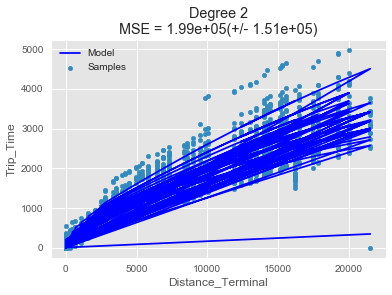

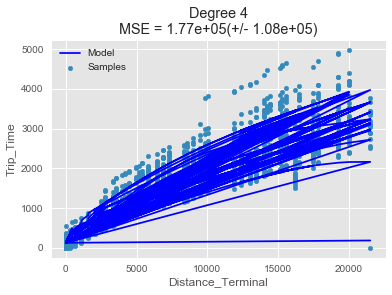

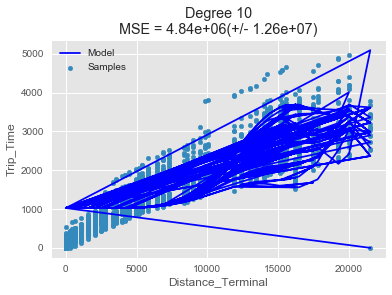

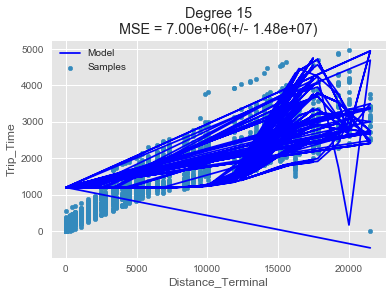

In [67]:
degrees = [2,4,10,15]

#plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X, y)

    df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time',label="Samples")
    plt.plot(X['Distance_Terminal'], pipeline.predict(X), c='Blue', label="Model")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
    plt.show()

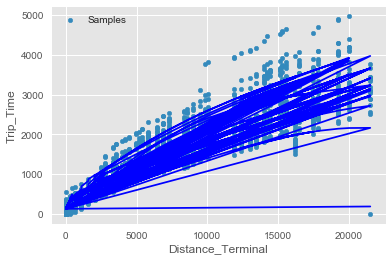

In [97]:
polynomial_features = PolynomialFeatures(degree=4,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
pipeline.fit(X, y)

df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time',label="Samples")
plt.plot(X['Distance_Terminal'], pipeline.predict(X), c='Blue', label="Model")

plt.savefig('Linear_Reg_Poly.png')

In [94]:
pipeline.named_steps['linear_regression'].get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [77]:
# MSE: Mean Squared Error
mse=((y-pipeline.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 131771.970239


In [90]:
# MAE:  Mean Absolute Error 
mae = abs(y-pipeline.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  253.761443277


In [78]:
pipeline.get_params()

{'linear_regression': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': True,
 'linear_regression__n_jobs': 1,
 'linear_regression__normalize': False,
 'polynomial_features': PolynomialFeatures(degree=4, include_bias=False, interaction_only=False),
 'polynomial_features__degree': 4,
 'polynomial_features__include_bias': False,
 'polynomial_features__interaction_only': False,
 'steps': [('polynomial_features',
   PolynomialFeatures(degree=4, include_bias=False, interaction_only=False)),
  ('linear_regression',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

In [70]:
lm_sk_predictions = pipeline.predict(X)

/Users/April/anaconda/envs/comp47350/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


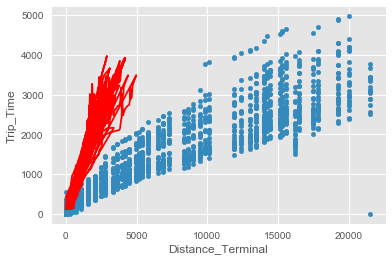

In [73]:
df.plot(kind='scatter', x='Distance_Terminal', y='Trip_Time')
plt.plot(y, lm_sk_predictions, c='red')
plt.legend(loc="best")
plt.savefig('SM_Linear_Reg.png')

# Train data set with SVM 

In [52]:
#Import SVM and assign to a model 
from sklearn import svm
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
clf = svm.SVR()

In [53]:
# Prepare the descriptive features
X = pd.concat([df[['Distance_Terminal','midweek','City_Centre_number']]], axis=1)
y = df.Trip_Time 

print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Distance_Terminal  midweek  City_Centre_number
0                 21507        1                   0
1                    10        1                   1
2                   305        1                   2
3                   471        1                   3
4                   683        1                   4
5                  1101        1                   5
6                  1590        1                   6
7                  2058        1                   7
8                  2493        1                   8
9                  2789        1                   9
10                 2789        1                   9
11                 3327        1                   9
12                 3327        1                   9
13                 3580        1                   9
14                 3966        1                   9
15                 4179        1                   9
16                 4462        1                   9
17                 4981

In [54]:
# Train the model 
%time clf.fit(X, y)

CPU times: user 83.2 ms, sys: 12.2 ms, total: 95.4 ms
Wall time: 106 ms


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
# Get the predicetion 
y_rbf = clf.predict(X)
y_rbf

array([ 1607.87406095,  1569.94849575,  1587.68586372, ...,  1622.53188222,
        1617.12625085,  1615.7593268 ])

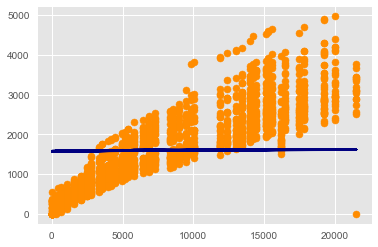

In [56]:
# Get the predicetion 
y_rbf = clf.predict(X)
y_rbf
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.savefig('SVM_result.png')

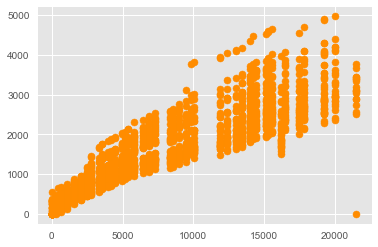

In [57]:
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')

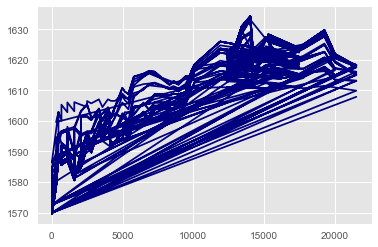

In [58]:
plt.plot(X['Distance_Terminal'], y_rbf, color='navy', label='RBF model')
plt.show()

# Train Data with Neural network model 

In [98]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
# Import MLPRegressor from sklearn.neural_network 
from sklearn.neural_network import MLPRegressor 
mlpreg=MLPRegressor()

In [99]:
# Prepare the descriptive features
X = pd.concat([df[['Distance_Terminal','midweek','','City_Centre_number']]], axis=1)
y = df.Trip_Time 

print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)

Descriptive features:
       Distance_Terminal  midweek  City_Centre_number
0                 21507        1                   0
1                    10        1                   1
2                   305        1                   2
3                   471        1                   3
4                   683        1                   4
5                  1101        1                   5
6                  1590        1                   6
7                  2058        1                   7
8                  2493        1                   8
9                  2789        1                   9
10                 2789        1                   9
11                 3327        1                   9
12                 3327        1                   9
13                 3580        1                   9
14                 3966        1                   9
15                 4179        1                   9
16                 4462        1                   9
17                 4981

In [100]:
# Train the data with MLP Regressor 
mlpreg.fit(X,y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

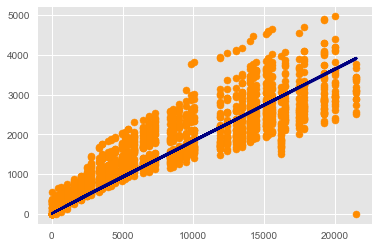

In [102]:
# Get the predicetion 
y_mlpreg = mlpreg.predict(X)
plt.scatter(X['Distance_Terminal'], y, color='darkorange', label='data')
plt.plot(X['Distance_Terminal'], y_mlpreg, color='navy', label='ANN model')
plt.savefig('ANN_result.png')

In [105]:
# MSE: Mean Squared Error   
# Mean Squared Error of linear: 131771.970239 
mse=((y-mlpreg.predict(X))**2).mean()
print("\n Mean Squared Error",mse)


 Mean Squared Error 283755.497139


In [106]:
# MAE:  Mean Absolute Error 

# Mean Absolute Error  of linear:  253.761443277
mae = abs(y-mlpreg.predict(X)).mean()
print("Mean Absolute Error ",mae)

Mean Absolute Error  407.528096426
